In [2]:
!pip install rdkit-pypi
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 37.7 MB/s eta 0:00:00


In [4]:
# The result of this code will be:
table=pd.DataFrame()
with open('pak1ligands.smi','r') as file:
    for index,line in enumerate(file):
        if 0<index<=100:
            table.loc[index,'SMILES']=line.split()[0]
            table.loc[index,'Id']=line.split()[1]

In [5]:
table.head(10)

,SMILES,Id
1,Cc1n[nH]c2sc(C(=O)NCCc3ccc(Cl)cc3)cc12,CHEMBL1998414
2,Cn1c2ccccc2c2c3c(c4c5ccccc5n(CCC#N)c4c21)CNC3=O,CHEMBL302449
3,CCCC(=O)Nc1n[nH]c2ccc(-c3cn(Cc4ccccc4)nn3)cc12,CHEMBL1977223
4,COCCn1cc(-c2ccncn2)c(-c2ccc(Cl)cc2)n1,CHEMBL1982866
5,O=C(CO)N1CCC(c2[nH]nc(-c3ccc(Cl)cc3F)c2-c2ccnc...,CHEMBL1614705
6,COc1cccc(C(C)NC(=O)N2CC=C(c3c[nH]c4ncccc34)CC2)c1,CHEMBL1965845
7,COc1ccc(OC)c(NC(=O)c2cnn3c(-c4ccccc4)ccnc23)c1,CHEMBL1982167
8,COc1cc(C=O)c(Cl)cc1NC(=O)Nc1cnc(C#N)cn1,CHEMBL207995
9,CC(NC(=O)c1ccc(-c2ccncc2)cc1)c1ccccc1,CHEMBL1999428
10,Cc1cccc(NC(=O)Nc2ccc(-c3csc4c(C#CCN5CCOCC5)cnc...,CHEMBL1982465


In [6]:
# We will calculate the descriptors and add them to our table
for i in table.index:
    mol=Chem.MolFromSmiles(table.loc[i,'SMILES'])
    table.loc[i,'MolWt']=Descriptors.ExactMolWt (mol)
    table.loc[i,'TPSA']=Chem.rdMolDescriptors.CalcTPSA(mol) #Topological Polar Surface Area
    table.loc[i,'nRotB']=Descriptors.NumRotatableBonds (mol) #Number of rotable bonds
    table.loc[i,'HBD']=Descriptors.NumHDonors(mol) #Number of H bond donors
    table.loc[i,'HBA']=Descriptors.NumHAcceptors(mol) #Number of H bond acceptors
    table.loc[i,'LogP']=Descriptors.MolLogP(mol) #LogP

In [7]:
descriptors = table.loc[:, ['MolWt', 'TPSA', 'nRotB', 'HBD','HBA', 'LogP']].values

In [8]:
descriptors_std = StandardScaler().fit_transform(descriptors)

In [9]:
pca = PCA()
descriptors_2d = pca.fit_transform(descriptors_std)

In [10]:
descriptors_pca= pd.DataFrame(descriptors_2d)
descriptors_pca.index = table.index
descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]
descriptors_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
1,-1.590939,-0.240926,-0.175204,0.746801,0.067963,-0.188619
2,-1.359496,-0.947795,-0.147884,-0.997689,0.176714,0.095008
3,0.240998,0.016422,0.572898,0.569559,-0.125212,0.304994
4,-1.794548,-0.780554,1.982279,-0.357384,-0.182233,0.133997
5,0.365601,0.468574,0.180957,-0.255980,0.664683,0.186115
6,-0.846868,-0.589057,-0.483362,0.411004,0.445017,0.127396
7,-0.140316,-0.365738,1.265480,-0.511537,-0.133040,0.115214
8,0.430451,1.624341,0.600742,-0.220824,-0.284237,0.831738
9,-2.611445,-1.251276,0.126183,0.587225,0.085018,0.146908
10,1.834847,-0.655952,-0.975443,-0.563747,0.295831,-0.524180


In [11]:
print(pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_))

[0.49064248 0.2206519  0.18213158 0.06517837 0.02479761 0.01659806]
1.0


<Figure size 576x432 with 0 Axes>

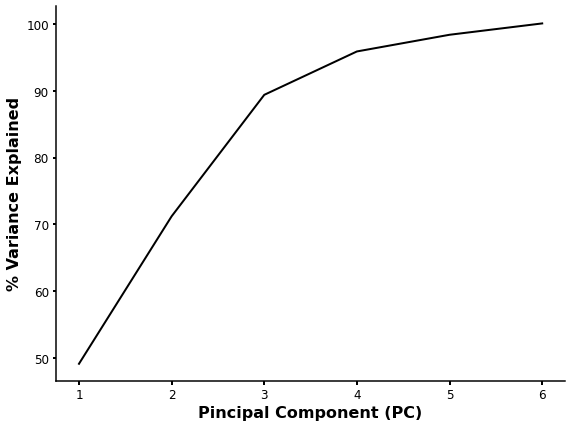

In [12]:


plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(8,6))

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot([i+1 for i in range(len(var))],var,'k-',linewidth=2)
plt.xticks([i+1 for i in range(len(var))])
plt.ylabel('% Variance Explained',fontsize=16,fontweight='bold')
plt.xlabel('Pincipal Component (PC)',fontsize=16,fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.tick_params ('both',width=2,labelsize=12)



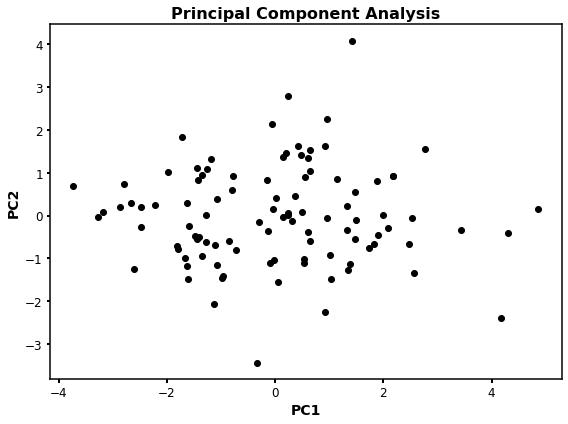

In [13]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1'],descriptors_pca['PC2'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

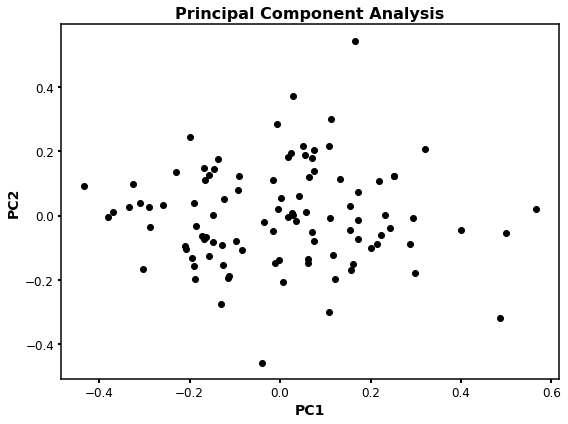

In [14]:
# This normalization will be performed just for PC1 and PC2, but can be done for all the components.
scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

# And we add the new values to our PCA table
descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1_normalized'],descriptors_pca['PC2_normalized'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3844843718448734
For n_clusters = 3 The average silhouette_score is : 0.36578423033558144
For n_clusters = 4 The average silhouette_score is : 0.35728147128924675
For n_clusters = 5 The average silhouette_score is : 0.3730682351277493
For n_clusters = 6 The average silhouette_score is : 0.37462244662991745
For n_clusters = 7 The average silhouette_score is : 0.389030184157273
For n_clusters = 8 The average silhouette_score is : 0.41382761571351423
For n_clusters = 9 The average silhouette_score is : 0.41338679774380954
For n_clusters = 10 The average silhouette_score is : 0.4002677995698741


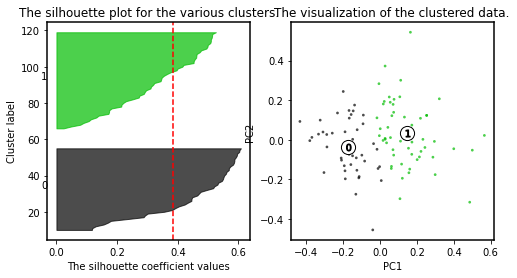

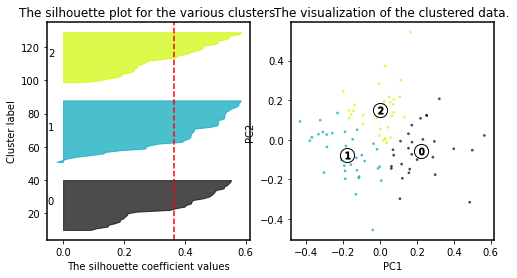

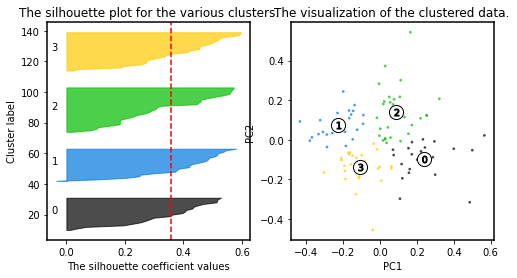

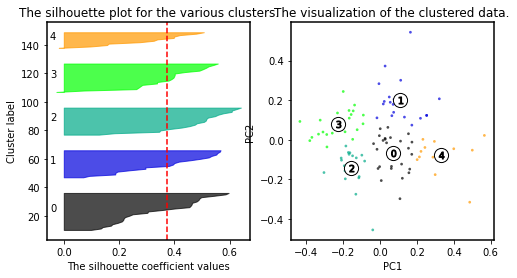

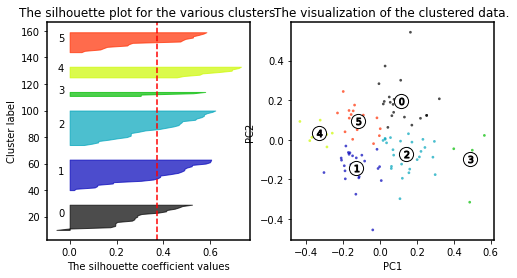

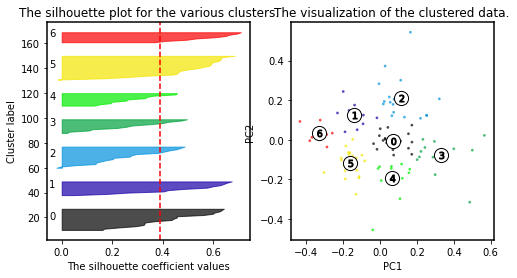

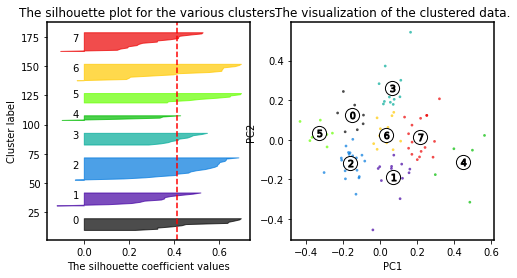

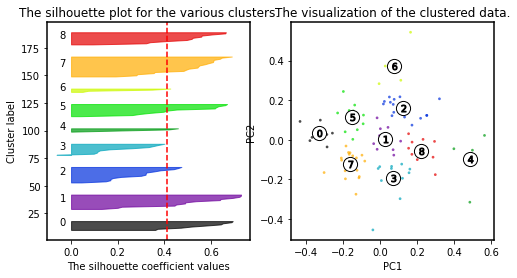

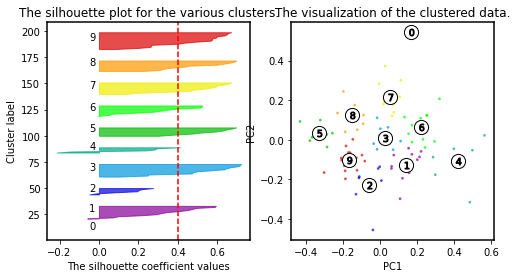

In [17]:
range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
    fig, (ax1,ax2)= plt.subplots(1, 2)
    fig.set_size_inches(8, 4)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])
    silhouette_avg = silhouette_score(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'], 
                marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')


    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")


    
plt.show()

<Figure size 720x576 with 0 Axes>

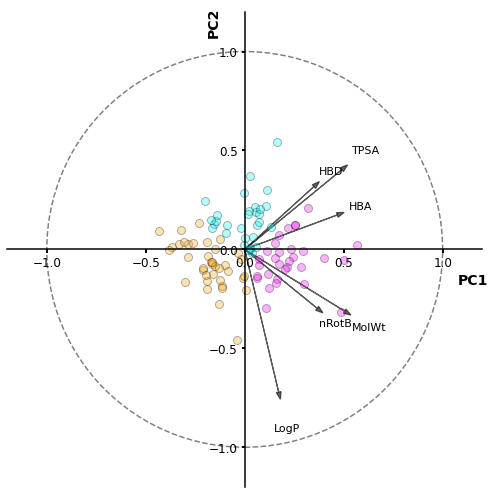

In [18]:
kmeans = KMeans(n_clusters=3, random_state=10) # We define the best number of clusters
clusters = kmeans.fit(descriptors_pca[['PC1_normalized','PC2_normalized']]) #PC1 vs PC2 (normalized values)
descriptors_pca['Cluster_PC1_PC2'] = pd.Series(clusters.labels_, index=table.index)
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(10,8))

fig, ax = plt.subplots(figsize=(7,7))

color_code={ 0:        'magenta',\
             1.0:   'orange',\
             2.0:      'cyan',\
             3.0:           'c',\
             4.0:        'm',\
             5.0:        'y',\
             6.0:        'darkorange',
             7.0:       'k',
             }

for i in descriptors_pca.index: 
        ax.plot(descriptors_pca.loc[i].at['PC1_normalized'],descriptors_pca.loc[i].at['PC2_normalized'],
                    c=color_code[descriptors_pca.loc[i].at['Cluster_PC1_PC2']],
                    marker='o',markersize=8,markeredgecolor='k',alpha=0.3)
        

plt.xlabel ('PC1',fontsize=14,fontweight='bold')
ax.xaxis.set_label_coords(0.98, 0.45)
plt.ylabel ('PC2',fontsize=14,fontweight='bold')
ax.yaxis.set_label_coords(0.45, 0.98)
plt.tick_params ('both',width=2,labelsize=12)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

lab=['MolWt', 'TPSA', 'nRotB', 'HBD','HBA', 'LogP'] #Feature labels

l=np.transpose(pca.components_[0:2, :]) ## We will get the components eigenvectors (main features) for PC1 and PC2

n = l.shape[0]
for i in range(n):
    plt.arrow(0, 0, l[i,0], l[i,1],color= 'k',alpha=0.6,linewidth=1.2,head_width=0.025)
    plt.text(l[i,0]*1.25, l[i,1]*1.25, lab[i], color = 'k',va = 'center', ha = 'center',fontsize=11)

circle = plt.Circle((0,0), 1, color='gray', fill=False,clip_on=True,linewidth=1.5,linestyle='--')
ax.add_artist(circle)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.tight_layout()
plt.show()

In [19]:
table=table.join(descriptors_pca)
table.head()

,SMILES,Id,MolWt,TPSA,nRotB,HBD,HBA,LogP,PC1,PC2,PC3,PC4,PC5,PC6,PC1_normalized,PC2_normalized,Cluster_PC1_PC2
1,Cc1n[nH]c2sc(C(=O)NCCc3ccc(Cl)cc3)cc12,CHEMBL1998414,319.054611,57.78,4.0,2.0,3.0,3.55872,-1.590939,-0.240926,-0.175204,0.746801,0.067963,-0.188619,-0.185086,-0.032028,1
2,Cn1c2ccccc2c2c3c(c4c5ccccc5n(CCC#N)c4c21)CNC3=O,CHEMBL302449,378.148061,62.75,2.0,1.0,4.0,4.59648,-1.359496,-0.947795,-0.147884,-0.997689,0.176714,0.095008,-0.158160,-0.125996,1
3,CCCC(=O)Nc1n[nH]c2ccc(-c3cn(Cc4ccccc4)nn3)cc12,CHEMBL1977223,360.169859,88.49,6.0,2.0,5.0,3.60830,0.240998,0.016422,0.572898,0.569559,-0.125212,0.304994,0.028037,0.002183,2
4,COCCn1cc(-c2ccncn2)c(-c2ccc(Cl)cc2)n1,CHEMBL1982866,314.093439,52.83,5.0,0.0,5.0,3.30690,-1.794548,-0.780554,1.982279,-0.357384,-0.182233,0.133997,-0.208773,-0.103763,1
5,O=C(CO)N1CCC(c2[nH]nc(-c3ccc(Cl)cc3F)c2-c2ccnc...,CHEMBL1614705,415.121131,95.00,4.0,2.0,5.0,3.02450,0.365601,0.468574,0.180957,-0.255980,0.664683,0.186115,0.042533,0.062290,2


In [20]:
table.to_csv('file_name.csv')